# Machine Learning: Gradiente Descendente Estocástico

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
np.random.seed(0) # Para termos sempre os mesmos números aleatórios.

Utilizaremos o dataset "Data for Admission in the University", disponível no Kaggle.

In [2]:
data = pd.read_csv('adm_data.csv')

### Visualizando o dataset

In [3]:
data.shape

(400, 9)

In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.rename(columns = {'Chance of Admit ': 'Chance of Admit'}, inplace = True)
data.rename(columns = {'LOR ': 'LOR'}, inplace = True)

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Definições:

__Serial No.:__ número de série do estudante (índice + 1)

__GRE Score:__ pontuação do estudante no GRE (Graduate Record Examination), um exame padronizado semelhante ao GMAT.

__TOEFL Score:__ pontuação no TOEFL, um exame completo de inglês utilizado, entre outras coisas, para admissão em universidades.

__University Rating:__ avaliação da universidade (quanto maior, mais conceituada é a universidade na qual o estudante quer entrar).

__SOP:__ avaliação do Statement of Purpose, uma redação explicando o propósito do estudante ao aplicar para uma vaga em uma dada graduação em uma universidade.

__LOR:__ avaliação da Letter of Recommendation, a carta de recomendação do estudante para a universidade.

__CGPA:__ Cumulative Grade Point Average, é uma pontuação utilizada para medir o desempenho médio de um estudante.

__Research:__ experiência em pesquisa (1 se o estudante tiver, 0 se não).

__Chance of Admit:__ chance de admissão na universidade, indo de 0 a 1 (100%).

### Definição da label e das features

Nossa label (y) será a Chance of Admit.

A lista de colunas ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"] contém as features altamente correlacionadas com a chance de admissão na universidade. No nosso caso, iremos tratar apenas das features contínuas, sendo a lista de features que pode ser utilizada a seguinte: features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"].

Implementaremos o algoritmo de __Gradiente Descendente Estocástico em mini-lotes__  nos seguintes casos:

1) Modelo de Regressão Linear com 1 feature.

2) Modelo de Regressão Linear com todas as features contínuas do dataset.

### 1) Modelo de Regressão Linear com 1 feature

O modelo será da forma: 

$\hat{y} = w_{1}x_{1} + b$

Em que $\hat{y}$ é a estimativa (ou predição) da label $y$, dado um valor da feature $x_{1}$, $w_{1}$ é o peso (weight) associado à feature $x_{1}$ e $b$ é chamado de viés (bias).

Vamos definir a perda (loss) associada ao modelo através da função de perda $L_{2}$, também chamada de squared loss. Assim:

$loss = \frac{1}{n}\sum_{i = 1}^{n} (\hat{y_{i}} - y_{i})^2$

Em que n é o número de dados que iremos utilizar no aprendizado de nosso modelo.

Podemos escrevê-la ainda como função explícita dos parâmetros $w_{1}$ e $b$:

$loss = f(w_{1}, b) = \frac{1}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})^2$

Como queremos reduzir a perda de nosso modelo ao máximo, devemos fazer os parâmetros variarem na direção do  negativo do gradiente de f (esse é o princípio do algoritmo de Gradiente Descendente Estocástico). 

Nesse contexto, chamemos $\theta = (w_{1}, b)$. Além disso, definimos o hiperparâmetro $\alpha$ como sendo a taxa de aprendizagem do modelo, a qual afeta diretamente a velocidade de convergência do modelo para os parâmetros ideais.

Assim, o novo valor de $\theta$, $\theta'$, será dado pela fórmula:

$\theta' = \theta - \alpha \cdot \nabla f(w_{1}, b)$

Onde $\nabla f(w_{1}, b) = (\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial b})$ é o gradiente de f.

Calculando as derivadas parciais:

$\frac{\partial f}{\partial w_{1}} = \frac{2}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i}) \cdot (x_{1})_{i}$

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})$

Obtemos os novos valores do peso e do viés após uma iteração:

$w_{1}' = w_{1} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i}) \cdot (x_{1})_{i}$

$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (w_{1}(x_{1})_{i} + b - y_{i})$

Com isso em mente, iremos implementar o modelo de regressão linear que se adequa aos dados através do Gradiente Descendente Estocástico em mini-lotes.

In [7]:
class Linear_Regression_Model():
    def __init__(self, data, feature_name: str, label_name: str, w1: float, b: float, alpha: float):
        self.feature = data[feature_name]
        self.label = data[label_name]
        self.w1 = w1
        self.b = b
        self.alpha = alpha
        
    def print_parameters(self):
        print(f'w1 = {self.w1}\nb = {self.b}')
        
    def get_prediction(self, x1: float):
        return self.w1*x1 + self.b
        
    def get_loss(self):
        loss = 0
        n = len(self.label)
        for (x1, y) in zip(self.feature, self.label):
            loss += (1/n)*(self.get_prediction(x1) - y)**2
        return loss
        
    def sgd_update_parameters(self, batch_size: int):
        index_list = list(range(0, len(self.label)))
        random_indices = np.random.choice(index_list, size = batch_size, replace = True) # bootstrap sample
        x1_sample = self.feature.iloc[random_indices]
        y_sample = self.label.iloc[random_indices]
        old_w1 = self.w1
        old_b = self.b
        for (x1, y) in zip(x1_sample, y_sample):
            partial_w1 = (2/batch_size) * (old_w1*x1 + old_b - y) * x1
            partial_b = (2/batch_size) * (old_w1*x1 + old_b - y)
            self.w1 -= self.alpha * partial_w1
            self.b -= self.alpha * partial_b
        
    def sgd(self, iterations: int, batch_size: float, print_loss: bool): # stochastic gradient descent
        for i in range(0, iterations):
            self.sgd_update_parameters(batch_size)
            if print_loss:
                print(f'loss = {self.get_loss()}')

In [8]:
feature_name = 'CGPA'
label_name = 'Chance of Admit'

In [9]:
model = Linear_Regression_Model(data = data, feature_name = feature_name, label_name = label_name, w1 = 0.2, b = -1, alpha = 0.01)

In [10]:
model.sgd(iterations = 100000, batch_size = 10, print_loss = False)

In [11]:
model.print_parameters()

w1 = 0.20992895147880755
b = -1.0697836389325213


### Plotando a reta de regressão obtida através do SGD e comparando com a curva analítica

#### Bibliotecas

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Obtendo os parâmetros da curva analítica através do numpy

In [13]:
m_np, b_np = np.polyfit(data[feature_name], data[label_name], 1)

In [14]:
m_np

0.20884722950069112

In [15]:
b_np

-1.071511662934231

#### Obtendo os pontos da reta SGD

In [16]:
x = np.arange(0, 10.01, 0.01)
y_sgd = []
for x1 in x:
    y_sgd.append(model.get_prediction(x1))
y_sgd = np.array(y_sgd)

#### Plot das retas

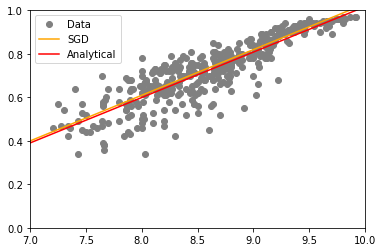

In [17]:
plt.plot(data[feature_name], data[label_name], 'o', color = 'gray') # Plot dos dados
plt.plot(x, y_sgd, color = 'orange') # Plot da reta SGD
plt.plot(x, m_np*x + b_np, color = 'red') # Plot da reta de regressão analítica
plt.xlim([7.0, 10.0])
plt.ylim([0, 1])
plt.legend(['Data', 'SGD', 'Analytical'])

### 2) Modelo de Regressão Linear com todas as features

Com n features, o modelo será da forma:

$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} + b$

Em que $\hat{y}$ é a estimativa (ou predição) da label $y$, dados os valores das features $x_{1}, x_{2},...,x_{n}$, $(w_{1}, w_{2},...,w_{n})$ é o conjunto de pesos (weight) associado às features e $b$ é chamado de viés (bias).

Vamos definir a perda (loss) associada ao modelo através da função de perda $L_{2}$, da mesma forma que foi feito no primeiro modelo. Assim:

$loss = \frac{1}{n}\sum_{i = 1}^{n} (\hat{y_{i}} - y_{i})^2$

Nesse contexto, chamemos $\theta = (w_{1}, w_{2}, ... , w_{n}, b)$. Além disso, definimos o hiperparâmetro $\alpha$ como a taxa de aprendizagem do modelo, de forma análoga ao modelo anterior.

Assim, por meio do gradiente descendente estocástico, o novo valor de $\theta$, $\theta'$, será dado pela fórmula:

$\theta' = \theta - \alpha \cdot \nabla f(w_{1}, w_{2}, ... , w_{n}, b)$

Onde $\nabla f(w_{1}, w_{2}, ... , w_{n}, b) = (\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},..., \frac{\partial f}{\partial w_{n}}, \frac{\partial f}{\partial b})$ é o gradiente de f.

Calculando as derivadas parciais:

$\frac{\partial f}{\partial w_{k}} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, para toda feature $x_{k}$.

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

Obtemos os novos valores do peso e do viés após uma iteração:

$w_{k}' = w_{k} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, para toda feature $x_{k}$.


$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

In [229]:
class Complete_Linear_Regression_Model():
    def __init__(self, data, features_name: list, label_name: str, ws: list, b: float, alpha: float):
        self.features = data[features_name]
        self.label = data[label_name]
        for i in range(0, len(ws)):
            ws[i] = float(ws[i])
        self.ws = np.array(ws) # weights
        self.b = b
        self.alpha = alpha
        
    def print_parameters(self):
        for i in range(1, len(self.ws) + 1):
            print(f'w{i} = {self.ws[i - 1]}')
        print (f'b = {self.b}')
        
    def get_prediction(self, xs: list):
        for i in range(0, len(xs)):
            xs[i] = float(xs[i])
        xs = np.array(xs)
        pred = np.dot(self.ws, xs) + self.b
        return pred
        
    def get_loss(self):
        n = len(self.label)
        y = np.array(self.label)
        preds = np.zeros(n)
        for i in range(0, n):
            xs = list(self.features.iloc[i])
            preds[i] += self.get_prediction(xs)
        diff = preds - y
        loss = (1/n)*np.dot(diff, diff)
        return loss
        
    def sgd_update_parameters(self, batch_size: int):
        n = len(self.label)
        index_list = list(range(0, n))
        random_indices = np.random.choice(index_list, size = batch_size, replace = True) # bootstrap sample
        xs_sample = list()
        y_sample = np.array(self.label.iloc[random_indices])
        preds_sample = np.zeros(batch_size)
        for i in range(0, batch_size):
            xs = list(self.features.iloc[random_indices[i]])
            preds_sample[i] += self.get_prediction(xs)
        for col in self.features:
            xs_sample.append(np.array(self.features[col].iloc[random_indices])) # len(xs_sample) = len(self.ws)
        diff_sample = preds_sample - y_sample
        partial_w = np.zeros(len(self.ws))
        for i in range(0, len(self.ws)):
            partial_w[i] += (2/batch_size) * np.dot(diff_sample, xs_sample[i])
        partial_b = (2/batch_size) * np.sum(diff_sample)
        self.ws -= self.alpha * partial_w
        self.b -= self.alpha * partial_b
        
    def sgd(self, iterations: int, batch_size: float, print_loss: bool): # stochastic gradient descent
        for i in range(0, iterations):
            self.sgd_update_parameters(batch_size)
            if print_loss:
                print(f'loss = {self.get_loss()}')

In [230]:
features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"]
label = 'Chance of Admit'
ws = [0, 0, 0, 0, 0, 0]
b = 0
alpha = 10**(-6)
complete_model = Complete_Linear_Regression_Model(data = data, features_name = features,
                                                 label_name = label, ws = ws, b = b, alpha = alpha)

In [231]:
complete_model.print_parameters()

w1 = 0.0
w2 = 0.0
w3 = 0.0
w4 = 0.0
w5 = 0.0
w6 = 0.0
b = 0


In [232]:
complete_model.sgd(iterations = 10000, batch_size = 50, print_loss = True)

loss = 0.33795641352695727
loss = 0.20749132352795016
loss = 0.1313317882738336
loss = 0.08343188426168881
loss = 0.05305170256990166
loss = 0.03682060736551999
loss = 0.02780903090544725
loss = 0.02271929885447901
loss = 0.019665527292746697
loss = 0.01767652635044551
loss = 0.01645504812842797
loss = 0.015675769567014483
loss = 0.01526849691464181
loss = 0.01505971505709416
loss = 0.014836961169452724
loss = 0.014900527105540042
loss = 0.014732533722160568
loss = 0.014717120003771874
loss = 0.014830218466856136
loss = 0.01472384382475922
loss = 0.01480119594212285
loss = 0.014914124483206921
loss = 0.014835740733993012
loss = 0.014923033741305157
loss = 0.014756374792666544
loss = 0.01493188601562787
loss = 0.014780012204957097
loss = 0.014668797885392292
loss = 0.014679017235884153
loss = 0.014668053565979068
loss = 0.014675937035399525
loss = 0.014668997075880524
loss = 0.014667564477728733
loss = 0.014684703861186293
loss = 0.014672666590158591
loss = 0.014718048068958982
loss = 0

loss = 0.014613448294967215
loss = 0.014613178971058734
loss = 0.014614848739914015
loss = 0.014612519489972815
loss = 0.014622246080549725
loss = 0.014645551398658859
loss = 0.014623006903552602
loss = 0.014613283008402792
loss = 0.014611829555667564
loss = 0.014617987767037438
loss = 0.014611105844822943
loss = 0.014610879180710164
loss = 0.014633763155328295
loss = 0.01478699219960923
loss = 0.01468650621265903
loss = 0.014621997244263782
loss = 0.01462471451938079
loss = 0.014656100975341415
loss = 0.01481904289989608
loss = 0.014697856669238602
loss = 0.01466201573642282
loss = 0.014640062674570537
loss = 0.014614220092793673
loss = 0.014612928049073229
loss = 0.014607864376228614
loss = 0.014615613522562921
loss = 0.01466361903457608
loss = 0.014611204472842237
loss = 0.014626480333311225
loss = 0.014701394671610218
loss = 0.01475032116141765
loss = 0.014644183066445894
loss = 0.014606739821257922
loss = 0.014608741839971011
loss = 0.014623349775021562
loss = 0.014653312134494105

loss = 0.014552974734595157
loss = 0.014607550591415297
loss = 0.014570424110150176
loss = 0.014584055644463849
loss = 0.014610123292210692
loss = 0.014597620983902182
loss = 0.01455205723069473
loss = 0.014592564339077534
loss = 0.01455218759661694
loss = 0.014553651684324782
loss = 0.01456796308063135
loss = 0.01455236931966183
loss = 0.014568918410083866
loss = 0.014579472130771605
loss = 0.014575735333343262
loss = 0.01455158997834587
loss = 0.014553094987757148
loss = 0.014559184496980678
loss = 0.014578952756690241
loss = 0.014559722265042098
loss = 0.01455600072569233
loss = 0.014565670250235634
loss = 0.014557593414073906
loss = 0.014558540577205405
loss = 0.014572846728050499
loss = 0.014567069327408352
loss = 0.0146170616557083
loss = 0.014569695501979481
loss = 0.014588134087918068
loss = 0.014555256726004075
loss = 0.014546291935542483
loss = 0.01455444303471475
loss = 0.014635081413493421
loss = 0.014733192794730246
loss = 0.014646765637410963
loss = 0.014645232570850424
l

loss = 0.014517819594752884
loss = 0.014506472591152677
loss = 0.014491282093676125
loss = 0.014497123578026346
loss = 0.014525012863900472
loss = 0.014509740315573725
loss = 0.014542680707970648
loss = 0.014580155356469423
loss = 0.014533264416923054
loss = 0.01463937238236139
loss = 0.014587551255979419
loss = 0.014552024015891802
loss = 0.014531598784699666
loss = 0.014537483806421742
loss = 0.01461259876326985
loss = 0.014556357572585915
loss = 0.0145597576083345
loss = 0.014514896344758903
loss = 0.014490143473034178
loss = 0.014488454876020896
loss = 0.014502794605977604
loss = 0.01450627387036941
loss = 0.014533031406326833
loss = 0.014541611047387193
loss = 0.014638608575454903
loss = 0.014632657545960943
loss = 0.01467770288430411
loss = 0.014489096267572686
loss = 0.01448853118419158
loss = 0.014491556744318755
loss = 0.014495246660385683
loss = 0.014495766482481331
loss = 0.014492532304357942
loss = 0.01448938180770153
loss = 0.014514456083975035
loss = 0.014500297488740203


loss = 0.014437399912618543
loss = 0.014440966250753315
loss = 0.014465513674461765
loss = 0.014433175716877638
loss = 0.01446378165259266
loss = 0.014511039108020346
loss = 0.014435828465689297
loss = 0.014480978282551293
loss = 0.014466551058675964
loss = 0.014542108630650788
loss = 0.014484323913138586
loss = 0.014444671549453766
loss = 0.014460846516479766
loss = 0.014435007677605154
loss = 0.014477302584152403
loss = 0.014476543446457536
loss = 0.014536832435119433
loss = 0.014468341087884208
loss = 0.014647164440560282
loss = 0.014503535270374956
loss = 0.01443983225706399
loss = 0.014433301120205577
loss = 0.014432909144232888
loss = 0.014428893379462005
loss = 0.01443843042330811
loss = 0.014428623180660632
loss = 0.014428146129548661
loss = 0.01444057382998396
loss = 0.014429221394590548
loss = 0.014429476620979136
loss = 0.0145012264671818
loss = 0.01450906771565986
loss = 0.014487360588594438
loss = 0.014439764741272065
loss = 0.014444562986166148
loss = 0.014426763795140737

loss = 0.014398072374826265
loss = 0.014513751039776607
loss = 0.014466466073751185
loss = 0.014455216296051543
loss = 0.01440788243830964
loss = 0.014424167433143495
loss = 0.014511573767510054
loss = 0.01443933423171886
loss = 0.014462037488041481
loss = 0.014489433185314348
loss = 0.014413839827618225
loss = 0.01443383433709681
loss = 0.014382114898118336
loss = 0.014403100949933894
loss = 0.014372951114379631
loss = 0.014376160720935708
loss = 0.01444258994938736
loss = 0.014443347399566195
loss = 0.014387631303262505
loss = 0.014372671703080287
loss = 0.014372259333727717
loss = 0.014371508781289488
loss = 0.014372461724537702
loss = 0.014371479742368659
loss = 0.014385441325566545
loss = 0.014371757546411092
loss = 0.01437646535729646
loss = 0.01437180296315921
loss = 0.014390148675894051
loss = 0.014402191087259417
loss = 0.014403998452847344
loss = 0.014404916549899229
loss = 0.014404054768594157
loss = 0.01437996714700882
loss = 0.014417744396815362
loss = 0.014391659293186022

loss = 0.014318209637916341
loss = 0.014327375584248077
loss = 0.01442898563263984
loss = 0.01436307813898329
loss = 0.01432986461727917
loss = 0.014317737834840668
loss = 0.014326582571587516
loss = 0.01434405799135878
loss = 0.014380611964573835
loss = 0.014479904487163754
loss = 0.014513489291033839
loss = 0.014368781652148575
loss = 0.01435618795169465
loss = 0.014330457093786522
loss = 0.01436859116911682
loss = 0.014317799859837638
loss = 0.014336116373957049
loss = 0.014314563992466665
loss = 0.01436510460724672
loss = 0.014325386121068267
loss = 0.014326429908399952
loss = 0.014314912979486439
loss = 0.014323492331975954
loss = 0.014317467887256604
loss = 0.01431334442289903
loss = 0.014313697904667062
loss = 0.014325801893805319
loss = 0.014312660530267545
loss = 0.014312421763568896
loss = 0.01434338136787099
loss = 0.01433926937228707
loss = 0.014330298787685679
loss = 0.014409097141716143
loss = 0.014324510705054357
loss = 0.014312951201574275
loss = 0.014337480540998135
lo

loss = 0.014265625257760152
loss = 0.014263058141409917
loss = 0.014272304942500603
loss = 0.0142643838331721
loss = 0.014277867856762454
loss = 0.01426413097733068
loss = 0.014269672921591918
loss = 0.014259501883064992
loss = 0.014268788019442168
loss = 0.014266067929946518
loss = 0.014319450294965048
loss = 0.014261024839524721
loss = 0.014294180056759342
loss = 0.014287413629911561
loss = 0.014266492915801688
loss = 0.01426944965245694
loss = 0.014265821811455786
loss = 0.01426069127328666
loss = 0.014285521591190122
loss = 0.014264839640574208
loss = 0.014260619617614254
loss = 0.014269054348033907
loss = 0.014279403491263803
loss = 0.014269253879255012
loss = 0.01425683110250464
loss = 0.014268639968973623
loss = 0.014284902354730851
loss = 0.014264187545639873
loss = 0.014264929230474002
loss = 0.014257297016717876
loss = 0.014257038845726853
loss = 0.014256858378533537
loss = 0.014300461230354049
loss = 0.014255233857925678
loss = 0.01433062020236958
loss = 0.014254996378009316

loss = 0.014208341315095097
loss = 0.014279214989325186
loss = 0.014215742944384584
loss = 0.01421815885767043
loss = 0.014207804683327814
loss = 0.014207767194537521
loss = 0.014205197217750896
loss = 0.014239694087057391
loss = 0.014208536779790892
loss = 0.014220401528613572
loss = 0.014241395264053389
loss = 0.014210518721862186
loss = 0.014203437812083363
loss = 0.01420405695049622
loss = 0.014206121626604258
loss = 0.014208679379205788
loss = 0.014202867673667779
loss = 0.014204762010695524
loss = 0.014240090074651214
loss = 0.014263140212747546
loss = 0.014207167230763793
loss = 0.014204566097954015
loss = 0.014204928529535943
loss = 0.01422455946690063
loss = 0.014243114168380838
loss = 0.01424503645971894
loss = 0.01420076335663413
loss = 0.01420192519935852
loss = 0.014243443864834582
loss = 0.014291051630784667
loss = 0.014221976946508492
loss = 0.014265329310444688
loss = 0.014200663154556993
loss = 0.0142002445358888
loss = 0.014200242893033146
loss = 0.014226795056940605


loss = 0.014153529105020522
loss = 0.014160404872404954
loss = 0.014150289617706131
loss = 0.014160773449884596
loss = 0.014200657286093677
loss = 0.014149512320048503
loss = 0.014155278856041483
loss = 0.014156450678097175
loss = 0.01416357798897139
loss = 0.0141525744543505
loss = 0.014189444512995038
loss = 0.014166880593734686
loss = 0.014232203792536731
loss = 0.014162093485648418
loss = 0.014165226368438848
loss = 0.014148231206349572
loss = 0.01414843191886983
loss = 0.014148844880876216
loss = 0.014154050026182481
loss = 0.014173799230484199
loss = 0.014194147061527636
loss = 0.014170161846435434
loss = 0.014200161090571688
loss = 0.014177802353481159
loss = 0.014199216833392144
loss = 0.014200058816426213
loss = 0.014153507903655257
loss = 0.014148521651337776
loss = 0.014151270215538405
loss = 0.014153382078121998
loss = 0.01414491766988902
loss = 0.014144761498039426
loss = 0.014235908004146003
loss = 0.014144245376620367
loss = 0.014147310678920702
loss = 0.0141673782543996

loss = 0.01424383093262024
loss = 0.014110371527089214
loss = 0.014238023137174316
loss = 0.014139389677527347
loss = 0.01410417195395461
loss = 0.014096829167337543
loss = 0.014115072285583445
loss = 0.014180471674075008
loss = 0.014142888676838635
loss = 0.014124338750430537
loss = 0.014149757376734514
loss = 0.01411217084168921
loss = 0.014156149022560427
loss = 0.014159041780332409
loss = 0.014095280676243476
loss = 0.014094131073945915
loss = 0.014094449518445767
loss = 0.014095108381463203
loss = 0.014096891369898565
loss = 0.014101865816461912
loss = 0.014092963897224814
loss = 0.014093975752611385
loss = 0.014095727776195048
loss = 0.014098375426628937
loss = 0.014094109763481978
loss = 0.014102573291109772
loss = 0.014112711427550939
loss = 0.014119553061378229
loss = 0.014138777314337388
loss = 0.014106823095760451
loss = 0.014091355512088219
loss = 0.014091162514798734
loss = 0.014109311269158646
loss = 0.014151834404604196
loss = 0.014157679599314927
loss = 0.01415725216541

loss = 0.014064553799669111
loss = 0.014042319343964804
loss = 0.014041983116110962
loss = 0.01405293673183586
loss = 0.014059066567858382
loss = 0.01404681345842694
loss = 0.0140424877522754
loss = 0.014056495198210684
loss = 0.0140870854583434
loss = 0.014088937213580892
loss = 0.014051338298129582
loss = 0.014048455383159264
loss = 0.014040530085480802
loss = 0.014046649935201922
loss = 0.014039469674561733
loss = 0.014080025133811472
loss = 0.01405165048189531
loss = 0.014045272630220549
loss = 0.014053145281899864
loss = 0.014088871402986612
loss = 0.014097161607943805
loss = 0.014094551542913246
loss = 0.014068518082468997
loss = 0.014071660795743917
loss = 0.014112220879551886
loss = 0.01407471630378422
loss = 0.014069798613945993
loss = 0.014143696587298322
loss = 0.014088194745154641
loss = 0.014138566609288685
loss = 0.014067521198809997
loss = 0.014049105525017053
loss = 0.014036610659051795
loss = 0.014053271669758456
loss = 0.014061883741449153
loss = 0.014039386606773731


loss = 0.014042987085940118
loss = 0.01405861172559623
loss = 0.014041668140674687
loss = 0.014009976665473312
loss = 0.014082735879061392
loss = 0.014070436783066173
loss = 0.014071523445455139
loss = 0.014016466289505383
loss = 0.014055182419094439
loss = 0.01401462368000478
loss = 0.014053593027234591
loss = 0.0140374928704872
loss = 0.014014082075888558
loss = 0.014029272224775293
loss = 0.014116061703644971
loss = 0.014109783871104958
loss = 0.014132350821157474
loss = 0.01410967274788065
loss = 0.014030740837051133
loss = 0.014006863409859916
loss = 0.014004316222807272
loss = 0.013988229744503143
loss = 0.01398606391663324
loss = 0.014005934166724092
loss = 0.013987227725220746
loss = 0.014022223145055464
loss = 0.014048076793024143
loss = 0.014093996430620766
loss = 0.014040417648645824
loss = 0.014124685669845425
loss = 0.014008772370734302
loss = 0.01400237752030368
loss = 0.013996860353572485
loss = 0.013985436642223252
loss = 0.013983798148575347
loss = 0.014046344850880734

loss = 0.01395052043303682
loss = 0.013938447616916427
loss = 0.01394917863007376
loss = 0.014028151889125332
loss = 0.014009894024635507
loss = 0.013968824654682329
loss = 0.014076378598809893
loss = 0.01394495031239715
loss = 0.013948157526731859
loss = 0.013940436089755774
loss = 0.013935718401088157
loss = 0.01393548708264026
loss = 0.013958334016067725
loss = 0.014007164197318636
loss = 0.013952554594158393
loss = 0.013998416245505374
loss = 0.013963445389236889
loss = 0.013944234608251747
loss = 0.013939188983984394
loss = 0.013935584090119085
loss = 0.013934431332771237
loss = 0.013940590081631284
loss = 0.013985707347520316
loss = 0.013935418716035248
loss = 0.01393911469119142
loss = 0.013939156550307991
loss = 0.013988437297049048
loss = 0.013978784039628569
loss = 0.014021198099010188
loss = 0.013976446178135201
loss = 0.013933179788371065
loss = 0.013945649166475066
loss = 0.013943489513744352
loss = 0.01393472203685298
loss = 0.013940702473378886
loss = 0.01395059057188961

loss = 0.01388981864785927
loss = 0.013924432297903157
loss = 0.013905280394156769
loss = 0.01393057705823513
loss = 0.01394767019573629
loss = 0.014034090755030305
loss = 0.014034561302929629
loss = 0.013936166669674968
loss = 0.013981557002922576
loss = 0.01395233571163197
loss = 0.013928636007717928
loss = 0.013922073882115058
loss = 0.014105224109758665
loss = 0.014030734022885724
loss = 0.014010640964584447
loss = 0.01403339821900353
loss = 0.01406467686748482
loss = 0.014041235712105757
loss = 0.01409812239273014
loss = 0.013994057485472108
loss = 0.014006225806286708
loss = 0.01400316706386431
loss = 0.013931510116493665
loss = 0.013949966231784246
loss = 0.014009642862613109
loss = 0.014017603877261354
loss = 0.014090167221967301
loss = 0.014001947847058839
loss = 0.01403936063808073
loss = 0.013919969666029526
loss = 0.01388981287292114
loss = 0.01389055975192854
loss = 0.01388849263786401
loss = 0.01397871615269477
loss = 0.013966687139266023
loss = 0.013920878325972176
loss 

loss = 0.013846546739269848
loss = 0.013855896879211436
loss = 0.013960874074673208
loss = 0.014107203042568375
loss = 0.014114755809196265
loss = 0.013869405007800402
loss = 0.013861703583615903
loss = 0.013851526730643405
loss = 0.01384296944279039
loss = 0.01383655756380911
loss = 0.013835221675838552
loss = 0.013843132183375023
loss = 0.013842899571270073
loss = 0.013856081160964996
loss = 0.013838342993306496
loss = 0.013843443042645117
loss = 0.013851656764834899
loss = 0.013898301637189567
loss = 0.013882855842474947
loss = 0.01387353121205281
loss = 0.013886738328890038
loss = 0.013832496345707206
loss = 0.01384835503961719
loss = 0.013901447283949717
loss = 0.01385671515781405
loss = 0.013835447744245633
loss = 0.013832954729921689
loss = 0.013831793134713274
loss = 0.013833349127364242
loss = 0.013854141491622651
loss = 0.013879539431508627
loss = 0.013874305898259989
loss = 0.013911689700420667
loss = 0.013863805826554177
loss = 0.013831146254333104
loss = 0.0138305716052891

loss = 0.013814883667617158
loss = 0.013808834316361077
loss = 0.013790996718201174
loss = 0.013866856317424455
loss = 0.013872808879799518
loss = 0.014120712432057078
loss = 0.013980162854933857
loss = 0.013907387613280893
loss = 0.013808141973293876
loss = 0.013792045453488224
loss = 0.013825567838382695
loss = 0.014004169765587658
loss = 0.01405603585832522
loss = 0.013908738780724808
loss = 0.013936691570655302
loss = 0.013887633367994154
loss = 0.013789828198930314
loss = 0.013785571385246973
loss = 0.013814235104587475
loss = 0.013801145594902633
loss = 0.01378335069370515
loss = 0.0137858702712547
loss = 0.013783681394451932
loss = 0.01382782292742142
loss = 0.01380887754126216
loss = 0.013813893040758736
loss = 0.013803448049136744
loss = 0.013784829437692317
loss = 0.013805867235466838
loss = 0.013781590134667262
loss = 0.013782421138049662
loss = 0.013789895368624735
loss = 0.013795041232402556
loss = 0.013849009878319773
loss = 0.013861972453676335
loss = 0.01378964117133419

loss = 0.01376530064277159
loss = 0.013841092655617787
loss = 0.013776541567992014
loss = 0.013811843156901975
loss = 0.01373636788092925
loss = 0.013848814554877565
loss = 0.013735833710334272
loss = 0.013764845575320895
loss = 0.013794460849334758
loss = 0.01384379158214744
loss = 0.01373717159736596
loss = 0.01374135146633862
loss = 0.013745102691963893
loss = 0.013734688613518006
loss = 0.013734357911348754
loss = 0.01375922227417084
loss = 0.013762740146902087
loss = 0.013792117628290657
loss = 0.013793989353425209
loss = 0.013803063569130743
loss = 0.01376358680183181
loss = 0.013736395435999872
loss = 0.013765583333570508
loss = 0.013733465364257551
loss = 0.013742081201662586
loss = 0.013780712902090165
loss = 0.013732402713766861
loss = 0.013732494985110142
loss = 0.01378354674165323
loss = 0.013785900423211683
loss = 0.013732056369181716
loss = 0.01373788273938248
loss = 0.013731460885050258
loss = 0.013731088949570038
loss = 0.01373379233933
loss = 0.013732103603136486
loss 

loss = 0.01369128350803987
loss = 0.013693167243032517
loss = 0.0136923008488743
loss = 0.013690126356248885
loss = 0.01369232277682567
loss = 0.01368829315364533
loss = 0.013687463720394331
loss = 0.013686098668223403
loss = 0.013687901114874427
loss = 0.0136861822871375
loss = 0.013686593648075457
loss = 0.013685460823703064
loss = 0.01368480485708075
loss = 0.013693081592050595
loss = 0.013717600592725301
loss = 0.013695642388536457
loss = 0.013686051746826982
loss = 0.013684692242488458
loss = 0.013706927382436424
loss = 0.013704215954237297
loss = 0.01368887841896819
loss = 0.013747496135418811
loss = 0.013719616278045632
loss = 0.013765716353793755
loss = 0.01373778915931247
loss = 0.013731227233681483
loss = 0.01372976179829778
loss = 0.013757120040292076
loss = 0.013721747133181502
loss = 0.013694490401947626
loss = 0.01368546910779632
loss = 0.013743054569361311
loss = 0.01368484425090719
loss = 0.01375107968916898
loss = 0.013688592984204542
loss = 0.013721002035225088
loss =

loss = 0.013655551895178086
loss = 0.013724913280735418
loss = 0.013649336394240728
loss = 0.013637546735937721
loss = 0.013647015492927418
loss = 0.013681832540397874
loss = 0.013729939303883203
loss = 0.013713341531337735
loss = 0.013737248409717875
loss = 0.013809136827426247
loss = 0.013770251250134187
loss = 0.013719346298659039
loss = 0.013688579627223203
loss = 0.013648413573613256
loss = 0.013636061496638395
loss = 0.013673521789467059
loss = 0.013687368684747991
loss = 0.013667708241999983
loss = 0.013640202618797939
loss = 0.013655804121391765
loss = 0.01363908975683722
loss = 0.01366687369359115
loss = 0.013697854699716015
loss = 0.01363426836847045
loss = 0.013636029317905233
loss = 0.013642956328927473
loss = 0.013633869321035594
loss = 0.013633513333660682
loss = 0.013634785877558717
loss = 0.013640311181591662
loss = 0.013651261675156486
loss = 0.013711262201010217
loss = 0.013748652314078678
loss = 0.01369778444522047
loss = 0.013644847999821186
loss = 0.013659248110722

loss = 0.013590046688065167
loss = 0.013590055969680454
loss = 0.013590657639245815
loss = 0.013590181782145074
loss = 0.013609023015341682
loss = 0.013644678299370928
loss = 0.013710546191957914
loss = 0.013598434000024305
loss = 0.013588777674036084
loss = 0.013588617364268097
loss = 0.013588355443288815
loss = 0.013588147310538541
loss = 0.013612685461515962
loss = 0.013597787432991955
loss = 0.013592576528696948
loss = 0.013598171659712067
loss = 0.013612718671175398
loss = 0.013644140412044684
loss = 0.013653666683364284
loss = 0.01372528258880363
loss = 0.013745833385765002
loss = 0.013656172489844893
loss = 0.013608961060875693
loss = 0.013643959954806722
loss = 0.013668414493338093
loss = 0.013613262904092333
loss = 0.013691481226838947
loss = 0.013666239905190123
loss = 0.013616981556926944
loss = 0.013585126234586513
loss = 0.013613591176852489
loss = 0.013587720647655175
loss = 0.013599441931921426
loss = 0.013585712378945807
loss = 0.013594252760836483
loss = 0.013585109822

loss = 0.013545972288555173
loss = 0.013541873511671881
loss = 0.013559275255644166
loss = 0.01355019981732371
loss = 0.0135418989001247
loss = 0.013545330007663595
loss = 0.013544470541549499
loss = 0.013619914915400742
loss = 0.013647039965595652
loss = 0.01358687678970205
loss = 0.01354403617055769
loss = 0.013555913692104687
loss = 0.013565967970733315
loss = 0.013545676613419355
loss = 0.013638789871156803
loss = 0.013736142454408951
loss = 0.013845583403822692
loss = 0.013645428983976174
loss = 0.013673113666470787
loss = 0.013722570952597643
loss = 0.013685885301805834
loss = 0.01361681617721425
loss = 0.013586430152803964
loss = 0.013674993524598712
loss = 0.013637405619535374
loss = 0.013543170574503246
loss = 0.013537534999459911
loss = 0.013559226416166192
loss = 0.013540241046157508
loss = 0.013542660063748402
loss = 0.013614409457465766
loss = 0.01354478775826158
loss = 0.013557117063706414
loss = 0.013667701530410139
loss = 0.01366534799898059
loss = 0.013564954272399175


loss = 0.013499441676934754
loss = 0.013503199415348393
loss = 0.013492623993180242
loss = 0.013561348498503488
loss = 0.013671047782013706
loss = 0.01367208529913459
loss = 0.013712235359935716
loss = 0.013760253002316529
loss = 0.013548114525249599
loss = 0.013500421368022337
loss = 0.013543686730728406
loss = 0.013502924739142034
loss = 0.013493902708992785
loss = 0.01349091912955068
loss = 0.013490853377276065
loss = 0.013518822823676042
loss = 0.013517233294875508
loss = 0.013490368285260857
loss = 0.013497417908642362
loss = 0.013493923504515922
loss = 0.013503095298274745
loss = 0.013515054487354381
loss = 0.013522734161435157
loss = 0.013553031944215177
loss = 0.01364219171255607
loss = 0.013728154185223123
loss = 0.013677863946786356
loss = 0.013640433441508677
loss = 0.013600776776840082
loss = 0.013732517448752507
loss = 0.013619568277699482
loss = 0.013541852505039552
loss = 0.013496720569984653
loss = 0.013489020737656046
loss = 0.013509411661201256
loss = 0.01348758449407

loss = 0.013453940629551497
loss = 0.013467954045969623
loss = 0.013483306982683707
loss = 0.013483510359841926
loss = 0.013445897817877035
loss = 0.013446194194206864
loss = 0.013493083914906986
loss = 0.013472654855275002
loss = 0.013454070074145763
loss = 0.013449357046257396
loss = 0.013450432980700918
loss = 0.013452417257192142
loss = 0.013445320253178452
loss = 0.013476794650491451
loss = 0.013462523587601872
loss = 0.013443825489697456
loss = 0.01344836158254071
loss = 0.013443354722066023
loss = 0.01344491995159366
loss = 0.013452439068578218
loss = 0.013446819156259558
loss = 0.013464313071548528
loss = 0.01346603695538001
loss = 0.013443976055605709
loss = 0.013452090192271133
loss = 0.013444202970587358
loss = 0.013448201309148958
loss = 0.013457370337089438
loss = 0.013493244936941824
loss = 0.013447576452356622
loss = 0.013450427461410168
loss = 0.013445947441728619
loss = 0.01344651474532575
loss = 0.01346319194992896
loss = 0.013443206075053409
loss = 0.0134403122441414

loss = 0.01341848494549773
loss = 0.013434933418223601
loss = 0.013408002787962836
loss = 0.013406962157523477
loss = 0.013464650914725885
loss = 0.013444019485502619
loss = 0.01343291225583216
loss = 0.01340096456280588
loss = 0.013405606505239894
loss = 0.013405061779246986
loss = 0.013484575009507149
loss = 0.013435860642404974
loss = 0.013406199968692386
loss = 0.013451978001251188
loss = 0.013425713466453684
loss = 0.013397135271019893
loss = 0.01339665968611695
loss = 0.01339996146055226
loss = 0.013396243707506517
loss = 0.013399784385125676
loss = 0.013473992931844734
loss = 0.013431136847091253
loss = 0.013409948299949417
loss = 0.013421296914006824
loss = 0.013519032246586437
loss = 0.01341541720430186
loss = 0.01342120167448926
loss = 0.01341918797533713
loss = 0.013441174948759294
loss = 0.013398537284790249
loss = 0.013438523757066691
loss = 0.013405380663685613
loss = 0.013410411156931161
loss = 0.013438526715327371
loss = 0.013421644902256237
loss = 0.01342725053257371
l

loss = 0.013429586852427407
loss = 0.013362584050128235
loss = 0.013365454029970416
loss = 0.013378491185737204
loss = 0.013351163981936462
loss = 0.013351529457414359
loss = 0.01335196350152017
loss = 0.013362408298111843
loss = 0.013373549095136666
loss = 0.01336607628701278
loss = 0.013367975485856273
loss = 0.013428950815435436
loss = 0.013503005036978473
loss = 0.013573597956345647
loss = 0.013390250938537214
loss = 0.013349365521189259
loss = 0.013353876696134916
loss = 0.013366827773818708
loss = 0.013354748373503532
loss = 0.013349172916703352
loss = 0.01334915460840453
loss = 0.013372589549400416
loss = 0.013368087678665517
loss = 0.0133550898062554
loss = 0.013348134276394887
loss = 0.01338572552091136
loss = 0.013359254345112453
loss = 0.013357269488356735
loss = 0.013350122105639165
loss = 0.013370842918170277
loss = 0.013383360777970666
loss = 0.013347898679664528
loss = 0.013392549736836559
loss = 0.013353757455952782
loss = 0.013346578110002684
loss = 0.01334855401354717

loss = 0.013337178493917317
loss = 0.01330736197542214
loss = 0.013306072411464615
loss = 0.013306678996422554
loss = 0.013306099262876328
loss = 0.013307107449784188
loss = 0.013328458916068462
loss = 0.01337561486378817
loss = 0.013349582103956124
loss = 0.013404091074496107
loss = 0.013319311107645117
loss = 0.013384753155624759
loss = 0.013395821377401038
loss = 0.013304230057372047
loss = 0.013364023980831856
loss = 0.013328739255862585
loss = 0.01330563599550719
loss = 0.01330896905045781
loss = 0.013306428555442413
loss = 0.01330351872500165
loss = 0.013305497578390073
loss = 0.013307678115115055
loss = 0.013344501765486228
loss = 0.013376316533160853
loss = 0.013334634752388533
loss = 0.013303525497291378
loss = 0.013302667720673749
loss = 0.013308726905994654
loss = 0.013333656137545707
loss = 0.013415480266076729
loss = 0.013448004760634883
loss = 0.013507235266841576
loss = 0.013377483438378338
loss = 0.013355576658607418
loss = 0.013314431329559775
loss = 0.0133736280911150

loss = 0.013266584888309643
loss = 0.013264021852708714
loss = 0.013273984354382647
loss = 0.013263931308807238
loss = 0.01326072022957447
loss = 0.013262628773181712
loss = 0.013329842479198568
loss = 0.013293958931154787
loss = 0.013280424403724287
loss = 0.013260155321413803
loss = 0.013294558759639015
loss = 0.013262825032327865
loss = 0.01327451957663762
loss = 0.013299526035695959
loss = 0.013265814562903863
loss = 0.01328643145195956
loss = 0.013293925744935374
loss = 0.013282309408258008
loss = 0.013267060804023791
loss = 0.013300157931539472
loss = 0.013333105728529233
loss = 0.013306530532549382
loss = 0.013261581164157646
loss = 0.013276386677093717
loss = 0.013261721710468737
loss = 0.013282163777239732
loss = 0.013283833389062178
loss = 0.013339443685793704
loss = 0.01328950680073952
loss = 0.013293626716631497
loss = 0.013289339350953123
loss = 0.013323914876218295
loss = 0.013276533547144594
loss = 0.013259606205819228
loss = 0.01325828722435205
loss = 0.0132554553819172

loss = 0.013224560308372987
loss = 0.013225364927318612
loss = 0.0132173170804026
loss = 0.013218433785982678
loss = 0.013219313723609832
loss = 0.013216818869551677
loss = 0.01321666221830419
loss = 0.01322623301439668
loss = 0.013234929319158093
loss = 0.013264897028094231
loss = 0.013240128704372342
loss = 0.013216748034026598
loss = 0.013262314812834122
loss = 0.013342149732008299
loss = 0.013396710983605674
loss = 0.01330852155968537
loss = 0.013272735072654099
loss = 0.013260375514718791
loss = 0.013242306461677402
loss = 0.013225957458082992
loss = 0.013237414887044028
loss = 0.013246072309667963
loss = 0.013226227483761451
loss = 0.013221234202694864
loss = 0.013219508316500435
loss = 0.013215143490231465
loss = 0.013214057753314301
loss = 0.013219362418959069
loss = 0.013213643974643346
loss = 0.013237398664876157
loss = 0.013235411647859787
loss = 0.013309779870588026
loss = 0.013213112074974633
loss = 0.013213567816955799
loss = 0.013212786307381031
loss = 0.0132127494700586

loss = 0.013180723255229315
loss = 0.013212474166210271
loss = 0.01320146209513654
loss = 0.013178258481721543
loss = 0.013191677914043942
loss = 0.013186471325026834
loss = 0.013200188951947286
loss = 0.013172708534170723
loss = 0.013173442991550823
loss = 0.01317757430324132
loss = 0.013172245610054444
loss = 0.013172030294004294
loss = 0.013187944886859338
loss = 0.013174097505890459
loss = 0.013179897120644006
loss = 0.013242473830209066
loss = 0.01317937322978291
loss = 0.013177430316091358
loss = 0.01329228138350833
loss = 0.013336852178701473
loss = 0.013310739771411412
loss = 0.013405615477701773
loss = 0.013354611210197652
loss = 0.013295260983501834
loss = 0.013204673710398095
loss = 0.013232273454660378
loss = 0.013184986638849728
loss = 0.013169545056627508
loss = 0.013186798266162961
loss = 0.013209773829439385
loss = 0.013221233759958158
loss = 0.013171276899485038
loss = 0.013171958501004218
loss = 0.013168568813423915
loss = 0.013170496264903818
loss = 0.013169793721873

loss = 0.01317677108034439
loss = 0.013131325116258126
loss = 0.01320880416915829
loss = 0.013252229460897833
loss = 0.013171391343688997
loss = 0.01318266863839091
loss = 0.013193535107316036
loss = 0.013172944022815483
loss = 0.01319599654921599
loss = 0.013193134583584884
loss = 0.013140739400636859
loss = 0.013130994365138138
loss = 0.013184970692444807
loss = 0.013129161352548695
loss = 0.013143167259974971
loss = 0.013134208603598731
loss = 0.013138703249700227
loss = 0.013199237402918281
loss = 0.0131328786957986
loss = 0.013133113865880302
loss = 0.013151515562655631
loss = 0.013169749795222762
loss = 0.013181930922878966
loss = 0.013145852620343741
loss = 0.013134798212386565
loss = 0.013188883355598766
loss = 0.01316809416656612
loss = 0.013130340208979041
loss = 0.01312646584720068
loss = 0.013128642183214512
loss = 0.01313398925988733
loss = 0.013171473320955793
loss = 0.01312672427441194
loss = 0.013144394570581204
loss = 0.013137326745012362
loss = 0.013165462975308082
lo

loss = 0.01309208540850277
loss = 0.013148097786764179
loss = 0.01309032786804504
loss = 0.013087217921627526
loss = 0.013087212606918584
loss = 0.013086890023978835
loss = 0.013097485021749218
loss = 0.013131233091840036
loss = 0.0130977177362229
loss = 0.013139257207458987
loss = 0.013106205261659181
loss = 0.013165010718184723
loss = 0.013111913761250888
loss = 0.013132166095455684
loss = 0.013110360123037403
loss = 0.013093699748638037
loss = 0.013094245791449226
loss = 0.013142179748543823
loss = 0.013110397864831013
loss = 0.013084828602952561
loss = 0.01308756189692665
loss = 0.013098579149966458
loss = 0.013086911401120017
loss = 0.013086902421870496
loss = 0.013147282451905001
loss = 0.013084015971038815
loss = 0.013111563869818404
loss = 0.013083899983620069
loss = 0.013095470713389302
loss = 0.013105089530068505
loss = 0.013124781248088411
loss = 0.013086278569626849
loss = 0.013086046006212913
loss = 0.013086390980854836
loss = 0.013101976433001346
loss = 0.0132993859462368

loss = 0.013060969019006448
loss = 0.013044922331009996
loss = 0.01304815133183188
loss = 0.013074926930083533
loss = 0.013045525866559389
loss = 0.01307785758224966
loss = 0.013072151895709417
loss = 0.013044519596241849
loss = 0.013070661678922551
loss = 0.0130849962042563
loss = 0.013049120646650876
loss = 0.013043670001772844
loss = 0.01305133124343766
loss = 0.013049108385976997
loss = 0.013054232480609232
loss = 0.013068028073417365
loss = 0.013104454613141484
loss = 0.013223835969288897
loss = 0.013238162670029927
loss = 0.013286098999822325
loss = 0.013151583496955941
loss = 0.013111254459161933
loss = 0.013129937108831305
loss = 0.01305211896702369
loss = 0.013053782548968659
loss = 0.01304206199634592
loss = 0.013096042824529964
loss = 0.013047764339717612
loss = 0.013076975852457942
loss = 0.013077236570258149
loss = 0.01310138361787238
loss = 0.013069780146576764
loss = 0.013077594594731472
loss = 0.013080940183311327
loss = 0.013049353462633575
loss = 0.01307772738315637
l

loss = 0.013027769897109825
loss = 0.013004684196919363
loss = 0.013003900260665373
loss = 0.013017840376977535
loss = 0.01302755233014954
loss = 0.013006753547790292
loss = 0.0130127333971484
loss = 0.013070705356437761
loss = 0.013027210877231079
loss = 0.013051550561131414
loss = 0.013134471698986645
loss = 0.013045470003699086
loss = 0.01305919052203101
loss = 0.013081678289735603
loss = 0.013078399729703519
loss = 0.01308766782410399
loss = 0.013010578997278418
loss = 0.013039175172959081
loss = 0.013153585263319927
loss = 0.013020789065410234
loss = 0.01301320255834318
loss = 0.013030889318248442
loss = 0.01301014642825455
loss = 0.013000839407800939
loss = 0.013000848245275734
loss = 0.013012236932550287
loss = 0.013004680681516216
loss = 0.013000018929167158
loss = 0.01299948000541094
loss = 0.013013562381196608
loss = 0.013003611112962044
loss = 0.012999277814678944
loss = 0.013000033618039473
loss = 0.013013603055888587
loss = 0.013004598877602644
loss = 0.012998276220617548


In [233]:
complete_model.get_loss()

0.013056150332928894

In [234]:
complete_model.print_parameters()

w1 = 0.000962202652914038
w2 = 0.0038404649439911895
w3 = 0.0016036098305072157
w4 = 0.001296063621564733
w5 = 0.0011642611098768598
w6 = 0.0006558152705398894
b = -5.7660752317892126e-05


In [236]:
n = len(data[label])
pred = np.zeros(n)
for i in range(0, n):
    xs = list(data[features].iloc[i])
    pred[i] += complete_model.get_prediction(xs)

In [242]:
data_with_pred = data.assign(Predictions = pred)

In [243]:
data_with_pred

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Predictions
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.801194
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.745281
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.721427
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.750166
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.712318
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.753498
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.742336
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.787295
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.715480
